# IncrementalInference-by-dataset-retrievers

- Plot incremental_inference
- NQ dev set
- k from 1 to 100

In [1]:
from cycler import cycler
import numpy as np
import seaborn as sns
import matplotlib as mpl
import pathlib
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import re
from util import utils

In [2]:
raw_light_palette = [
    (0, 122, 255), # Blue
    (255, 149, 0), # Orange
    (52, 199, 89), # Green
    (255, 59, 48), # Red
    (175, 82, 222),# Purple
    (255, 45, 85), # Pink
    (88, 86, 214), # Indigo
    (90, 200, 250),# Teal
    (255, 204, 0)  # Yellow
]

raw_gray_light_palette = [
    (142, 142, 147),# Gray
    (174, 174, 178),# Gray (2)
    (199, 199, 204),# Gray (3)
    (209, 209, 214),# Gray (4)
    (229, 229, 234),# Gray (5)
    (242, 242, 247),# Gray (6)
]


light_palette = np.array(raw_light_palette)/255
gray_light_palette = np.array(raw_gray_light_palette)/255

Light mode palette


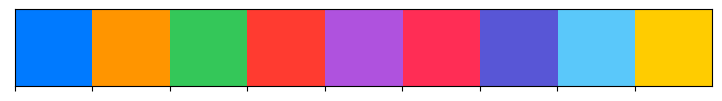

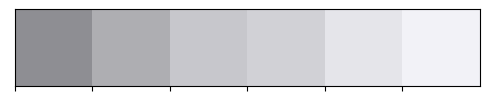

In [3]:
print('Light mode palette')
sns.palplot(light_palette)
sns.palplot(gray_light_palette)

In [4]:
# cmap 수정
mpl.rcParams['axes.prop_cycle'] = cycler('color',light_palette)
# 해상도 조정
mpl.rcParams['figure.dpi'] = 200
# ax의 우측과 상단 지우기
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

## KILT BM25 NQ negative (from DPR) depreciated

In [5]:
# option = 'bm25'
# path = '/data/philhoon-relevance/FiD/results/KILT_DPR_NQ'
# # path = '/data/philhoon-relevance/FiD/results/KILT_DPR_NQ_depreciated'
# plot_path = './img/FiDResultOnBM25HardnegativeNQdevSubsets.png'
# title = 'FiD result on BM25 negative nq dev subsets'

## KILT Random Sampling NQ negative  depreciated

In [6]:
# option = 'random'
# path = '/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ'
# plot_path = './img/FiDResultOnRandomSamplingnegativeNQdevSubsets.png'
# title = 'FiD result on random sampling negative nq dev subsets'

## KILT BM25 NQ negative (from DPR)

In [7]:
# option = 'bm25'
# path = '/data/philhoon-relevance/FiD/results/KILT_BM25_NQ'

## KILT Random Sampling NQ negative 

In [8]:
# option = 'random'
# path = '/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ'
# plot_path = './img/New_FiDResultOnRandomSamplingnegativeNQdev2539.png'
# title = 'New FiD result on random sampling negative nq dev subsets'

## incremental inferences by data, retrievers

In [9]:
paths = ['/data/philhoon-relevance/FiD/results/NQ_DPR/DEV',
        '/data/philhoon-relevance/FiD/results/NQ_SEAL/DEV',
        '/data/philhoon-relevance/FiD/results/NQ_CONTRIEVER/DEV',
        '/data/philhoon-relevance/FiD/results/TQA_DPR/DEV',
        '/data/philhoon-relevance/FiD/results/TQA_SEAL/DEV',
        '/data/philhoon-relevance/FiD/results/TQA_CONTRIEVER/DEV',
       ]

In [10]:
print('NQ' in '/data/philhoon-relevance/FiD/results/TQA_SEAL/DEV')

False


In [11]:
def get_dict_eval(path):
    path_path = pathlib.Path(path)
    dict_eval = {
    'ctx' : [],
    'em' : []
    }

    sample_size = 100

    for ctx in range(1, sample_size+1):
        if 'NQ' in path:
            file_name_ = f'NQ_dev_{ctx}_context'
        else:
            file_name_ = f'TQA_dev_{ctx}_context'
        file_path = list(path_path.glob(f'**/{file_name_}*/*.txt'))

        test = file_path[0]

        df = pd.read_csv(test, sep = '\t', header=None)
        df.columns = ['id','inference','em']
    #     print(len(df))
        em = float(sum(df['em'])/len(df))

        dict_eval['ctx'].append(ctx)
        dict_eval['em'].append(em)
        
    return dict_eval

In [12]:
dic_eval_lst = []
for path_ in paths:
    print(path_)
    dict_eval = get_dict_eval(path_)
    dic_eval_lst.append(dict_eval)

/data/philhoon-relevance/FiD/results/NQ_DPR/DEV
/data/philhoon-relevance/FiD/results/NQ_SEAL/DEV
/data/philhoon-relevance/FiD/results/NQ_CONTRIEVER/DEV
/data/philhoon-relevance/FiD/results/TQA_DPR/DEV
/data/philhoon-relevance/FiD/results/TQA_SEAL/DEV
/data/philhoon-relevance/FiD/results/TQA_CONTRIEVER/DEV


In [13]:
# pprint(dic_eval_lst[0])

In [14]:
# dict_eval_2 = get_dict_eval(path)

In [15]:
# len(dict_eval['em'])

# merge final_output.txt files

In [16]:
# paths = ['/data/philhoon-relevance/FiD/results/NQ_DPR/DEV',
#         '/data/philhoon-relevance/FiD/results/NQ_SEAL/DEV',
#         '/data/philhoon-relevance/FiD/results/NQ_CONTRIEVER/DEV',
#         '/data/philhoon-relevance/FiD/results/TQA_DPR/DEV',
#         '/data/philhoon-relevance/FiD/results/TQA_SEAL/DEV',
#         '/data/philhoon-relevance/FiD/results/TQA_CONTRIEVER/DEV',
#        ]
sample_size = 100
# path = '/data/philhoon-relevance/FiD/results/NQ_DPR/DEV'
# title = 'FiD result by number of passage on DPR retrieved dataset'
# path = pathlib.Path(path)


In [17]:
def merge_output(path, sample_size):
    path_name = str(path)
    path = pathlib.Path(path)
    id_lst = []
    inference_lst = []
    em_lst = []
    
    for ctx in range(1, sample_size+1):
        if 'NQ' in path_name:
            file_name_ = f'NQ_dev_{ctx}_context'
        else:
            file_name_ = f'TQA_dev_{ctx}_context'
            
        file_path = list(path.glob(f'**/{file_name_}*/*.txt'))
        test = file_path[0]

        df = pd.read_csv(test, sep = '\t', header=None)
        df.columns = ['id','inference','em']

        if not id_lst:
            id_lst = df.id.to_list()
        inference_lst.append(df.inference.to_list())
        em_lst.append(df.em.to_list())
    return id_lst, inference_lst, em_lst
    

In [18]:
def get_em_result(em_zip):
    cul_cnt = 0
    cul_em = []
    conversion = []
    for em in em_zip:
        if '1' in em:
            cul_em.append('1')
            cul_cnt += 1
        else:
            cul_em.append('0')

        conversion.append(len(re.findall(r'10', em)))
    
    return cul_em, conversion, cul_cnt

In [19]:
def get_merged_result(id_, em_zip, infer_zip, conversion_lst, cul_em_lst):
    result = {}
    for query_id, em_pattern, inference, conversion, cumulative_em in zip(id_, em_zip, infer_zip, conversion_lst, cul_em_lst):
        template = {
            'em_pattern' : em_pattern,
            'inference' : inference,
            'conversion' : conversion,
            'cumulative_em' : cumulative_em
        }
        result[str(query_id)] = template
    return result

In [20]:
def merge_final_output(path, sample_size):
    id_, infer_, em_ = merge_output(path, sample_size)
    
    # em_pattern
    em_zip = list(map(lambda line: ''.join(map(lambda s: str(1) if s else str(0), line)), zip(*em_)))

    # inference
    infer_zip = list(map(list, zip(*infer_)))

    # cumulative_em, conversion
    cul_em_lst, conversion_lst, cul_cnt = get_em_result(em_zip)
    
    result = get_merged_result(id_, em_zip, infer_zip, conversion_lst, cul_em_lst)
    
    return result

In [21]:
result_lst = []
for path_ in paths:
    print(path_)
    result = merge_final_output(path_, sample_size)
    result_lst.append(result)

/data/philhoon-relevance/FiD/results/NQ_DPR/DEV
/data/philhoon-relevance/FiD/results/NQ_SEAL/DEV
/data/philhoon-relevance/FiD/results/NQ_CONTRIEVER/DEV
/data/philhoon-relevance/FiD/results/TQA_DPR/DEV
/data/philhoon-relevance/FiD/results/TQA_SEAL/DEV
/data/philhoon-relevance/FiD/results/TQA_CONTRIEVER/DEV


In [22]:
for i in range(0,6):
    print(len(result_lst[i]))
# pprint(len(result_lst[0]))
# pprint(len(result_lst[3]))

8757
8757
8757
8837
8837
8837


In [23]:
# pprint(result_lst[0])

In [24]:
# result = merge_final_output(path, sample_size)

### merge above outputs to orignal file

In [25]:
# nq_dev_file = '/data/philhoon-relevance/FiD/open_domain_data/NQ/dev.json'

In [26]:
def merge_with_input(nq_dev_format, result, sample_size):
    for idx, dev_example in enumerate(nq_dev_format):
        id_ = str(idx)
        if id_ in result.keys():
            dev_example['ctxs'] = dev_example['ctxs'][:sample_size]
            dev_example['em_pattern'] = result[id_]['em_pattern']
            dev_example['inference'] = result[id_]['inference']
            dev_example['conversion'] = result[id_]['conversion']
            dev_example['cumulative_em'] = result[id_]['cumulative_em']
        else:
            print('ID not exist. Mathcing ID required')
    return nq_dev_format

In [27]:
def merge_with_original(nq_dev_file, result, sample_size):
    nq_dev_format = utils.open_json(nq_dev_file)
    final_output = merge_with_input(nq_dev_format, result, sample_size)
    return final_output

In [28]:
# final_output = merge_with_original(nq_dev_file, result, sample_size)

In [29]:
final_output_lst = []
for result_, path_ in zip(result_lst, paths):
    if 'NQ' in path_:
        nq_dev_file = '/data/philhoon-relevance/FiD/open_domain_data/NQ/dev.json'
    else:
        nq_dev_file = '/data/philhoon-relevance/FiD/open_domain_data/TQA/dev.json'
    final_output = merge_with_original(nq_dev_file, result_, sample_size)
    final_output_lst.append(final_output)

## NQ dev DPR incremetal result 

In [30]:
def extract_em_pattern(final_output):
    em_pattern_lst = []
    for instance in final_output:
        em_pattern_lst.append(instance['em_pattern'])
    return em_pattern_lst

In [31]:
def get_accumulated_em(em_pattnern_lst, sample_size):
    incre_em = {
        'ctx' : [],
        'em' : [],   
    }
    for ctx in range(1, sample_size+1):
        incre_em['ctx'].append(ctx)
        cnt = 0
        for pattern in em_pattnern_lst:
            if '1' in pattern[:ctx]:
                cnt += 1
        incre_em['em'].append(cnt/len(em_pattnern_lst))
    return incre_em

In [32]:
def get_plot_data(final_output, sample_size):
    em_pattnern_lst = extract_em_pattern(final_output)
    incre_em = get_accumulated_em(em_pattnern_lst, sample_size)
    return incre_em

In [33]:
incre_em = get_plot_data(final_output, sample_size)

In [34]:
incre_em_lst = []
for final_out_ in final_output_lst:
    incre_em = get_plot_data(final_out_, sample_size)
    incre_em_lst.append(incre_em)

In [35]:
# incre_em_lst

## Plot

In [36]:
# plot_path = './img/NQ_DEV_DPR_AcEM_EM_100.png'
# title = 'FiD result on NQ DEV DPR'

In [37]:
# df_normal = pd.DataFrame(data=dict_eval)
# print(dict_eval)

In [38]:
# df_incre = pd.DataFrame(data=incre_em)
# print(dict_eval)

In [39]:
# df_incre_

In [40]:
df_normal_lst = []
df_incre_lst = []
for dict_eval_, incre_em_ in zip(dic_eval_lst, incre_em_lst):
    df_normal_ = pd.DataFrame(data=dict_eval_)
    df_normal_lst.append(df_normal_)
    
    df_incre_ = pd.DataFrame(data=incre_em_)
    df_incre_lst.append(df_incre_)

In [ ]:
# normal = df_normal_lst[2]
# incre = df_incre_lst[2]

In [ ]:
# pprint(df_normal_lst[0])

In [ ]:
# pprint(df_normal_lst[1])

In [ ]:
# pprint(df_normal_lst[2])

In [ ]:
# pprint(df_normal_lst[3])

In [ ]:
# pprint(df_normal_lst[4])

In [ ]:
# pprint(df_normal_lst[5])

In [ ]:
# pprint(df_incre_lst[0])

In [ ]:
# pprint(df_incre_lst[1])

In [ ]:
# pprint(df_incre_lst[2])

In [ ]:
# pprint(df_incre_lst[3])

In [ ]:
# pprint(df_incre_lst[4])

In [ ]:
# pprint(df_incre_lst[5])

In [ ]:
# df_incre

In [ ]:
# pos_set = set(df['pos'])

In [ ]:
# from cycler import cycler
# # marker='*',
# # default_cycler = (cycler(markers=['1', '2', '3' ,'4','8']))
# # c = plt.cycler(color=["Blue", "Orange", "Green",'Red','Purple'],
# #                markersize=[10, 10, 10, 10, 10],
# #                marker=["o", "s", "^", '1', '3'])
# # plt.rcParams["axes.prop_cycle"] = c

# # plt.rc('axes', prop_cycle=default_cycler)

In [ ]:
# df

In [ ]:
# selected_data = df.loc[df['pos'] == pos]

In [ ]:
# selected_data

In [ ]:
# normal = df_normal_lst[2]
# incre = df_incre_lst[2]

In [41]:
plot_path = './img/incrementalinferece_data_retriever.pdf'

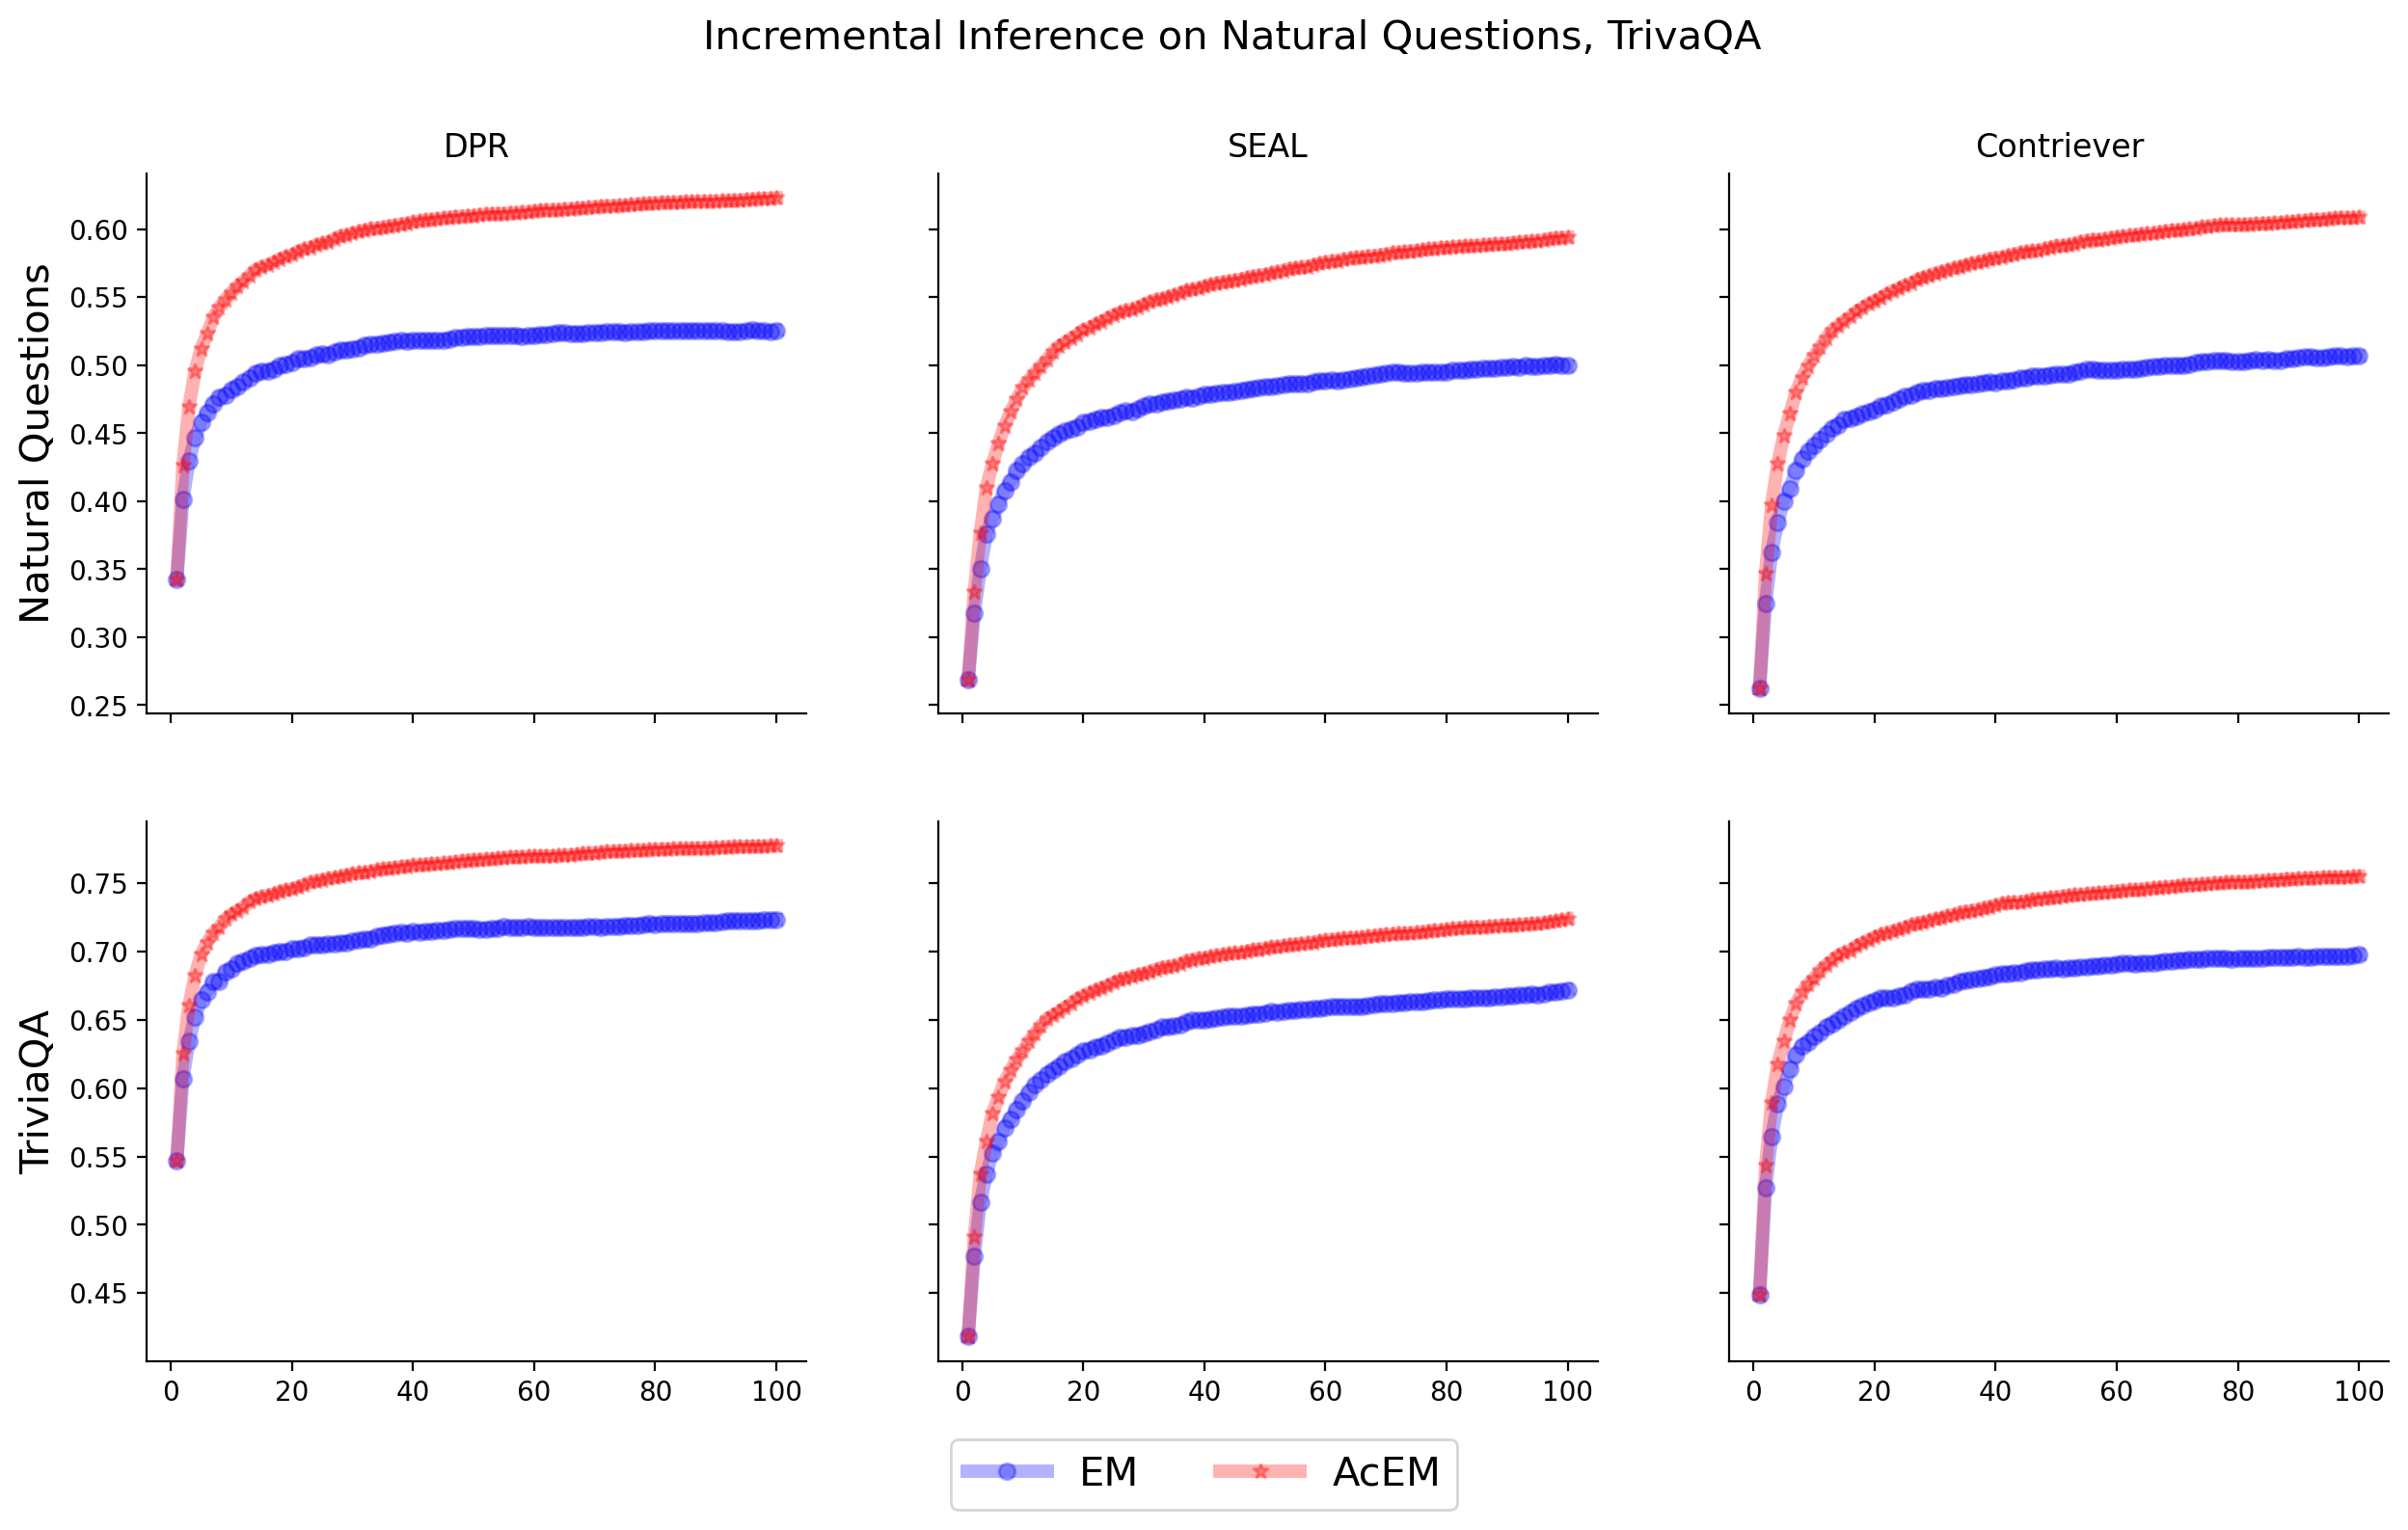

In [42]:
fig, ax = plt.subplots(2,3, figsize=(15, 8), sharex=True, sharey='row')
cnt = 0
for row in range(2):
    for col in range(3):
        
        ax[row][col].plot(df_normal_lst[cnt]['ctx'], df_normal_lst[cnt]['em'], label='EM', alpha = 0.3, linewidth=5, color = 'blue', marker = "o")    
        ax[row][col].plot(df_incre_lst[cnt]['ctx'], df_incre_lst[cnt]['em'], label='AcEM', alpha = 0.3, linewidth=5, color = 'red', marker = "*")
        cnt += 1
        if row ==0 and col == 0:
            ax[row][col].set_title(f'DPR')
        if row ==0 and col == 1:
            ax[row][col].set_title(f'SEAL')
        if row ==0 and col == 2:
            ax[row][col].set_title(f'Contriever')
        if row == 0 and col == 0:
            ax[row][col].set_ylabel(f'Natural Questions', fontsize = 15)
        if row == 1 and col == 0:
            ax[row][col].set_ylabel(f'TriviaQA', fontsize = 15)

# ax.legend(title='Normal vs Accumulated', fontsize = 'x-small')
# handles, labels = ax[row][col].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center')


# lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
# lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend(lines, labels, loc='upper center', ncol=2)
handles, labels = ax[row][col].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, fontsize = 15)
fig.suptitle('Incremental Inference on Natural Questions, TrivaQA', fontsize = 15)
plt.savefig(plot_path, format="pdf", bbox_inches="tight")
plt.show()


In [ ]:
# fig=plt.figure()
# data=np.arange(900).reshape((30,30))
# for i in range(1,5):
#     ax=fig.add_subplot(2,2,i)        
#     ax.imshow(data)

# fig.suptitle('Main title') # or plt.suptitle('Main title')
# plt.show()

In [ ]:
# # plot something
# fig, axs = plt.subplots(3,3, figsize=(15, 8), sharex=True, sharey=True)
# for i, ax in enumerate(axs.flat):
#     ax.scatter(*np.random.normal(size=(2,200)))
#     ax.set_title(f'Title {i}')

# # set labels
# plt.setp(axs[-1, :], xlabel='x axis label')
# plt.setp(axs[:, 0], ylabel='y axis label')

In [ ]:
# fig, ax = plt.subplots(3, 10, figsize = (20, 7))
# for row in range(3):
#     for col in range(10):
#         if row == 0:
#             ax[row][col].set_title('your title')

#         ax[row][col].tick_params(top = 'off', bottom = 'off', left = 'off', right = 'off', labelleft = 'on', labelbottom = 'on')
#         ax[row][col].imshow(np.random.randint(0, 10, (10, 10)))
#         ax[row][col].set_xticks([])
#         ax[row][col].set_yticks([])
#         ax[row][col].set_xlabel('x label')
#         if col == 0:
#             ax[row][col].set_ylabel(f'row = {row}')

# plt.show()

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize=(4, 4))
# # ax.plot(df['ctx'], selected_data['em'], label=pos, alpha = 0.5, linewidth=5)
# ax.plot(df_normal['ctx'],df_normal['em'], label='dpr eval', alpha = 0.3, linewidth=5, color = 'blue', marker = "o")    
# ax.plot(df_incre['ctx'],df_incre['em'], label='dpr acc eval', alpha = 0.3, linewidth=5, color = 'red', marker = "*")
# # ax.set_title('FiD result on BM25 hard negative nq dev subsets')
# ax.set_title(title)
# ax.legend(title='Normal vs Accumulated', fontsize = 'x-small')
# plt.ylabel('EM')
# plt.xlabel('Number of Context')
# # plt.savefig(plot_path, dpi=300)
# plt.show()

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize=(4, 4))
# # ax.plot(df['ctx'], selected_data['em'], label=pos, alpha = 0.5, linewidth=5)

# ax.plot(normal['ctx'],normal['em'], label='dpr eval', alpha = 0.3, linewidth=5, color = 'blue', marker = "o")    
# ax.plot(incre['ctx'],incre['em'], label='dpr acc eval', alpha = 0.3, linewidth=5, color = 'red', marker = "*")
# # ax.plot(normal['ctx'],normal['em'], alpha = 0.3, linewidth=5, color = 'blue', marker = "o")    
# # ax.plot(incre['ctx'],incre['em'], alpha = 0.3, linewidth=5, color = 'red', marker = "*")

# # ax.set_title('FiD result on BM25 hard negative nq dev subsets')
# # ax.set_title(title)
# ax.legend(title='Normal vs Accumulated', fontsize = 'x-small')
# # plt.ylabel('EM')
# # plt.xlabel('Number of Context')
# # plt.savefig(plot_path, dpi=300)
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', ncol=2)
# # fig.legend(labels, loc='upper center')
# plt.show()